# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt

Now we can define our integration algorithms

In [2]:
#define midpoint rule
def midpoint_rule(f, a, b, n):
    h = (b-a) / n
    ans = 0
    for i in range(n):
        ans += f((a + h/2.0) + i*h)
    ans *= h
    return ans

In [3]:
#define trapazoidal rule
def trapezoidal_rule(f,a,b,n):
    h = (b-a) / n
    ans = 0
    trap = np.zeros(n-1)
    for i in range(1,n):
        trap[i-1] = a + i*h
    ans = (h/2)*(f(a) + 2*np.sum(f(trap)) + f(b))
    return ans

In [4]:
#define simpson's rule
def simpsons_rule(f,a,b,n):
    h = (b-a) / n
    ans, evens, odds = 0,0,0
    s = np.zeros(n-1)
    for i in range(1,n):
        s[i-1] = a + i*h
    for i in range(len(s)):
        if (i+1) % 2 == 0:
            evens = evens + 2*f(s[i])
        else:
            odds = odds + 4*f(s[i])
    ans = (h/3)*(f(a) + evens + odds + f(b))
    return ans
    

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

I can check these functions with a simple integral or create print statements along the way to make sure the outputs are the intended ones.

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

I have seen integrals like this before, but I'm not sure specifically where I saw them.

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [5]:
#exact solution to the integral
f1 = lambda x: 2/(4 + x**2)**(3/2)
exact_solution = integrate.quad(f1,0,2)
print(exact_solution)

(0.3535533905932738, 3.925231146709438e-15)


In [6]:
#solve the integral using your integration functions
print(midpoint_rule(f1,0,2,6))
print(trapezoidal_rule(f1,0,2,6))
print(simpsons_rule(f1,0,2,6))

0.35385997545853143
0.35293994641413146
0.3535517906244493


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [7]:
#scipy integration
a,b,n = 0,2,6
h = (b-a) / n
xs = np.linspace(a,b,n+1)
ys = 2/(4 + xs**2)**(3/2)

trap = integrate.trapz(ys,xs,h)
simps = integrate.simps(ys,xs,h)
print(trap)
print(simps)

0.35293994641413146
0.35355179062444925


# Question
How do scipy integrals compare to yours? Support your answer. 

These integrals are very close to my function-generated values

In [8]:
#print the numerical values
print(trapezoidal_rule(f1,0,2,6))
print(trap)
print(simpsons_rule(f1,0,2,6))
print(simps)

0.35293994641413146
0.35293994641413146
0.3535517906244493
0.35355179062444925


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [9]:
#numerical comparisons
def percent_error(approx,exact):
    ans = (approx-exact)/exact
    return ans
f1 = lambda x: 2/(4 + x**2)**(3/2)
exact_answer = (integrate.quad(f1,0,2))[0]
approx_mid = midpoint_rule(f1,0,2,6)
approx_trapz = trapezoidal_rule(f1,0,2,6)
approx_simps = simpsons_rule(f1,0,2,6)
m = percent_error(approx_mid,exact_answer)
t = percent_error(approx_trapz,exact_answer)
s = percent_error(approx_simps,exact_answer)
print(m)
print(t)
print(s)


0.0008671529489313703
-0.0017350821558038288
-4.5253952219184745e-06


# Question
Which method provides the best approximation to the exact solution?

Simpson's Method clearly creates the best approximation to the exact solution.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

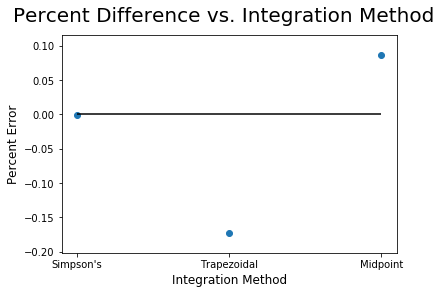

In [10]:
#plot
methods = ['Simpson\'s','Trapezoidal','Midpoint']
values = [s*100,t*100,m*100]
plt.figure()
plt.scatter(methods,values)
plt.suptitle("Percent Difference vs. Integration Method",fontsize=20)
plt.xlabel("Integration Method",fontsize=12)
plt.ylabel("Percent Error",fontsize=12)
plt.hlines(0,0,2,colors='k')
plt.show()
plt.close()

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [11]:
#solve integral above
f1 = lambda x: math.exp(-x**2)
exact_solution = integrate.quad(f1,-np.inf,np.inf)
print(exact_solution)
square = (exact_solution[0])**2
print(square)

(1.7724538509055159, 1.4202636780944923e-08)
3.1415926535897927


# Question
If you square your solution, does the resulting number have any special meaning?

The square of the solution is pi.